In [14]:
import nltk
import string
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    no_punc_trans = str.maketrans('', '', string.punctuation)
    tokens = nltk.word_tokenize(text.translate(no_punc_trans))
    stems = stem_tokens(tokens, stemmer)
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_files
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'to_analyse')
dataset = load_files(data_path, shuffle=False)
print("n_samples: %d" % len(dataset.data))
print(dataset.target)
print(dataset.target_names)

n_samples: 4533
[0 0 0 ..., 1 1 1]
['hit', 'miss']


In [17]:
dataset.data = dataset.data[:5000]
dataset.target = dataset.target[:5000]
print("n_samples: %d" % len(dataset.data))

n_samples: 4533


In [18]:
dataset.data[0][:500]

b"Git, the open source distributed version control system created by Linus Torvalds to handle Linux's decentralized development model, is being used for a rather surprising project: Windows.\n\nTraditionally, Microsoft's software has used a version control system called Source Depot. This is proprietary and internal to Microsoft; it's believed to be a customized version of the commercial Perforce version control system, tailored for Microsoft's larger-than-average size. Over the years, Redmond has a"

In [19]:
# split the dataset in training and test set using a specific seed for reproducibility
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=80)

In [36]:
# Vectorise to extract features and filter out tokens that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenize, min_df=3, max_df=0.95, ngram_range=(1, 3))),
    ('clf', AdaBoostClassifier()),
])

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(clf__learning_rate=learning_rate, clf__n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(pipeline, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=10)
grid_result = grid_search.fit(docs_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=100 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV] clf__lear

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  7.0min


[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=100, score=-0.4655710897589336, total= 4.9min
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=200, score=-0.4654839107354621, total= 5.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=200 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=200, score=-0.42764217869519144, total= 5.4min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=200, score=-0.463136909560355, total= 4.5min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=200, score=-0.459706139670403, total= 4.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.3min


[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4648211400577114, total= 4.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.42785678104792496, total= 4.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4630433531695663, total= 3.8min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4263617400754772, total= 3.8min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4391305619642432, total= 3.1min
[CV] clf__learning_rate=0.0001, clf__n_estimators=300 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.45965374210248283, total= 3.2min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 .......

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 22.7min


[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4587244584437461, total= 3.4min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=300, score=-0.4425590529299239, total= 3.4min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.464172288867209, total= 3.8min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.4280774244923343, total= 3.7min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.4742734156491769, total= 3.6min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.4629586121759064, total= 3.6min
[CV] clf__learning_rate=0.0001, clf__n_estimators=400 ..........

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 32.6min


[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.44385565634972624, total= 3.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.4587208136713771, total= 3.2min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=400, score=-0.4426494534285087, total= 3.3min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.4283040200559195, total= 4.2min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.4741949666102416, total= 4.4min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 ................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.46288257511949255, total= 4.2min
[CV] clf__learning_rate=0.0001, clf__n_estimators=500 .......

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 47.0min


[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.44394774161400524, total= 3.9min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.4587249799381876, total= 3.6min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV]  clf__learning_rate=0.0001, clf__n_estimators=500, score=-0.4427469903300157, total= 3.8min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV]  clf__learning_rate=0.001, clf__n_estimators=100, score=-0.46338522253145364, total= 1.9min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV]  clf__learning_rate=0.001, clf__n_estimators=100, score=-0.42897626755903906, total= 2.0min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV]  clf__learning_rate=0.001, clf__n_estimators=100, score=-0.47460863251360896, total= 2.0min
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .........

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 60.5min


[CV]  clf__learning_rate=0.001, clf__n_estimators=100, score=-0.45911751041614357, total= 2.1min
[CV] clf__learning_rate=0.001, clf__n_estimators=200 .................
[CV]  clf__learning_rate=0.001, clf__n_estimators=100, score=-0.44332658151135806, total= 2.3min
[CV] clf__learning_rate=0.001, clf__n_estimators=200 .................


In [ ]:
# plot results
import numpy
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

In [35]:
# Predict the outcome on the testing set 
pipeline.fit(docs_train, y_train)
y_predicted = pipeline.predict(docs_test)

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

In [25]:
# How did the classifier perform?
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        hit       0.60      0.51      0.55       229
       miss       0.88      0.91      0.90       905

avg / total       0.82      0.83      0.83      1134



In [26]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[116 113]
 [ 78 827]]


In [27]:
from sklearn.metrics import average_precision_score
y_score = pipeline.decision_function(docs_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


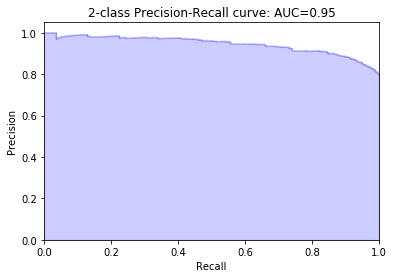

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
plt.show()

In [15]:
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

In [ ]:
skplt.plot_learning_curve(pipeline, docs_train, y_train)
plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function plot_learning_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_learning_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
# Test some specific (new) examples
from newspaper import Article
import requests
url = 'https://deepmind.com/blog/cognitive-psychology/'
r = requests.get(url, verify=False) # False only because of local proxy issues.
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
article.parse()
hit1 = article.text
hit1[:100]

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'This is known as the ‘black-box’ problem, and it is becoming increasingly important as neural networ'

In [30]:
from newspaper import Article
import requests
url = 'https://deepmind.com/blog/cognitive-psychology/'
r = requests.get(url, verify=False)
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
article.parse()
hit1 = article.text
url = 'https://theconversation.com/teaching-machines-to-understand-and-summarize-text-78236'
r = requests.get(url, verify=False)
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
hit2 = article.text
url = 'https://www.theguardian.com/football/2017/jul/07/chelsea-romelu-lukaku-offer-match-manchester-united'
r = requests.get(url, verify=False)
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
article.parse()
miss1 = article.text
url = 'https://arstechnica.com/business/2017/07/renewables-have-briefly-exceeded-nuclear-for-the-first-time-in-decades/'
r = requests.get(url, verify=False)
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
article.parse()
miss2 = article.text

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is be

In [31]:
url = 'https://arstechnica.com/tech-policy/2017/09/jury-finds-nintendo-wii-infringes-dallas-inventors-patent-awards-10m/'
r = requests.get(url, verify=False)
article = Article(url, fetch_images=False)
article.download(input_html=r.text)
article.parse()
miss3 = article.text

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [33]:
docs_new = [hit1, hit2, miss1, miss2, miss3]
predicted = pipeline.predict(docs_new)
print(predicted)
for doc, category in zip(['hit1', 'hit2', 'miss1', 'miss2', 'miss3'], predicted):
     print('%r => %s' % (doc, dataset.target_names[category]))

[1 1 1 1 0]
'hit1' => miss
'hit2' => miss
'miss1' => miss
'miss2' => miss
'miss3' => hit


In [ ]:
grid_search.decision_function(docs_new)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
pipeline = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.95, stop_words='english')),
    ('clf', BernoulliNB()),
])
pipeline.fit(docs_train, y_train)

In [ ]:
y_predicted = pipeline.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

In [ ]:
docs_new = [hit1, hit2, miss1, miss2, miss3]
predicted = pipeline.predict(docs_new)
print(predicted)
for doc, category in zip(['hit1', 'hit2', 'miss1', 'miss2', 'miss3'], predicted):
     print('%r => %s' % (doc, dataset.target_names[category]))

In [ ]:
pipeline.predict_proba(docs_new)